# Overview

In this notebook, we use K-means clustering algorithm to split dataset to n clusters.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


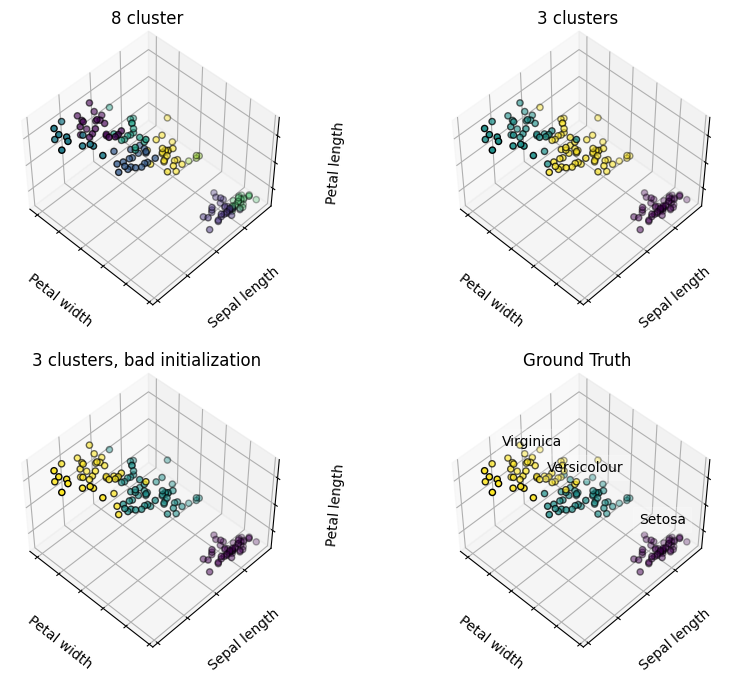

In [1]:
import matplotlib.pyplot as plt

# for 3D projection to work with matplotlib <3.2
import mpl_toolkits.mplot3d
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris=datasets.load_iris()
X=iris.data
y=iris.target

estimators=[
    ('k_means_iris_8', KMeans(n_clusters=8)),
    ('k_means_iris_3', KMeans(n_clusters=3)),
    ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random')),
]

fig=plt.figure(figsize=(10,8))
titles=['8 cluster','3 clusters', '3 clusters, bad initialization']
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax=fig.add_subplot(2,2, idx+1, projection='3d', elev=48, azim=134)
    est.fit(X)
    labels=est.labels_
    
    ax.scatter(X[:,3],X[:,0],X[:,2],c=labels.astype(float), edgecolor='k')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(title)
    
# plot the ground truth
ax=fig.add_subplot(2,2,4,projection='3d', elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour',1), ('Virginica',2)]:
    ax.text3D(
        X[y==label,3].mean(),
        X[y==label,0].mean(),
        X[y==label,2].mean()+2,
        name,
        horizontalalignment='center',
        bbox=dict(alpha=0.2, edgecolor='w', facecolor='w'),
    )

ax.scatter(X[:,3], X[:,0],X[:,2],c=y, edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()